## 697. 数组的度 - Hash table 储存索引

给定一个非空且只包含非负数的整数数组 nums，数组的度的定义是指数组里任一元素出现频数的最大值。

你的任务是在 nums 中找到与 nums 拥有相同大小的度的最短连续子数组，返回其长度。

示例 1：
```
输入：[1, 2, 2, 3, 1]
输出：2
解释：
输入数组的度是2，因为元素1和2的出现频数最大，均为2.
连续子数组里面拥有相同度的有如下所示:
[1, 2, 2, 3, 1], [1, 2, 2, 3], [2, 2, 3, 1], [1, 2, 2], [2, 2, 3], [2, 2]
最短连续子数组[2, 2]的长度为2，所以返回2.
```

示例 2：
```
输入：[1,2,2,3,1,4,2]
输出：6
```


提示：

- nums.length 在1到 50,000 区间范围内。
- nums[i] 是一个在 0 到 49,999 范围内的整数。

### Best Solution

<b>解题思路</b>

本题可以按照两部分求解：

- 先求原数组的度；
- 再求与原数组相同度的最短子数组。

<b>求原数组的度</b>

求数组的度--各个元素的出现次数，用 <b>字典（哈希表）计数, key 是元素，value 是次数。 value 的最大值就是数组的度</b> $degree$。

<b>求与原数组相同度的最短子数组</b>

长度 = 出现次数最多的元素 第一次和最后一次出现的位置（最短，因为可能不止一个）

- 使用 `left` 和 `right` 分别保存了每个元素在数组中第一次出现的位置和最后一次出现的位置；使用 `counter` 保存每个元素出现的次数
- 数组的度 $degree$ 等于 `counter.values()` 的最大值
- 对counter再次遍历：
  - 如果元素 k 出现的次数等于 degree，则找出元素 k 最后一次出现的位置 和 第一次出现的位置，计算两者之差+1，即为子数组长度。
  - 对所有出现次数等于 degree 的子数组的最短长度，取 min
 


In [3]:
from typing import List
import collections

class Solution:
    def findShortestSubArray(self, nums: List[int]) -> int:
        left, right = dict(), dict()
        counter = collections.Counter()
        for i, num in enumerate(nums):
            if num not in left:
                left[num] = i
            right[num] = i
            counter[num] += 1
        degree = max(counter.values())
        res = len(nums)
        for num, v in counter.items():
            if v == degree:
                res = min(res, right[num] - left[num] + 1)
                
        return res

In [4]:
if __name__ == "__main__":
    ss = Solution()
    nums1 = [1,2,2,3,1]
    nums2 = [1,2,2,3,1,4,2]
    nums3 = [1,3,2,2,3,1]
    # length1 = ss.findShortestSubArray(nums1)
    # length2 = ss.findShortestSubArray(nums2)
    length = ss.findShortestSubArray(nums3)
    print(length) 

2


## 1178. 猜字谜 -  hashmap 状态压缩
字谜的迷面 puzzle 按字符串形式给出，如果一个单词 word 符合下面两个条件，那么它就可以算作谜底：

单词 word 中包含谜面 puzzle 的第一个字母。
单词 word 中的每一个字母都可以在谜面 puzzle 中找到。
例如，如果字谜的谜面是 "abcdefg"，那么可以作为谜底的单词有 "faced", "cabbage", 和 "baggage"；而 "beefed"（不含字母 "a"）以及 "based"（其中的 "s" 没有出现在谜面中）都不能作为谜底。
返回一个答案数组 answer，数组中的每个元素 answer[i] 是在给出的单词列表 words 中可以作为字谜迷面 puzzles[i] 所对应的谜底的单词数目。

示例：
```
输入：
words = ["aaaa","asas","able","ability","actt","actor","access"], 
puzzles = ["aboveyz","abrodyz","abslute","absoryz","actresz","gaswxyz"]
输出：[1,1,3,2,4,0]
解释：
1 个单词可以作为 "aboveyz" 的谜底 : "aaaa" 
1 个单词可以作为 "abrodyz" 的谜底 : "aaaa"
3 个单词可以作为 "abslute" 的谜底 : "aaaa", "asas", "able"
2 个单词可以作为 "absoryz" 的谜底 : "aaaa", "asas"
4 个单词可以作为 "actresz" 的谜底 : "aaaa", "asas", "actt", "access"
没有单词可以作为 "gaswxyz" 的谜底，因为列表中的单词都不含字母 'g'。
 ```

提示：

- 1 <= `words.length` <= 10^5
- 4 <= `words[i].length` <= 50
- 1 <= `puzzles.length` <= 10^4
- `puzzles[i].length` == 7
- `words[i][j], puzzles[i][j]` 都是小写英文字母。
- 每个 puzzles[i] 所包含的字符都不重复。



My way in this question will exceed the limited time.
### 解题思路
两个条件：

 - 单词 word 中包含谜面 puzzle 的第一个字母。
 - 单词 word 中的每一个字母都可以在谜面 puzzle 中找到。

- 把每个字符串用二进制数字表示（状态压缩）
- 寻找所有子集（subset）

首先让所有 words 和 puzzle 两两匹配肯定是不行的，时间复杂度到了 $O(M * N) = 10 ^ 9$，会超时。

一个简单的思路是，对于每个 `puzzle` 没有必要遍历所有 `words`，只用找符合条件的 `words` 出现了多少次就行了 ---- 状态压缩。

#### 第一步：状态压缩
第二个条件只要求能找到（出现一次即可），对出现次数没要求。

为了解决这个问题，我们可以使用二进制数字来表每个 `word` 和 `puzzle`

这道题只包含 26 个小写字母，可以压缩到一个 `int` 中, `int` 中的每一位取0和1表示字符是否出现过

比如 "aabb" 可以用 11 表示，"accc" 可以用 101 表示。

这样一来，不同的单词可能映射成同一个数字，比如 "aabbb" 和 "ab" 都映射成了 11。这就是状态压缩。

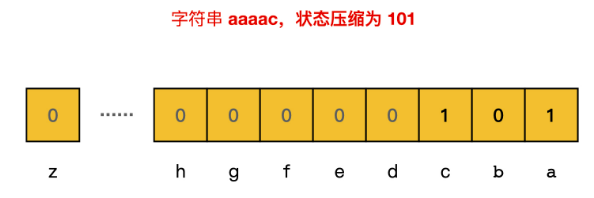

把每个 word 都做状态压缩，并用 hashmap 保存每个二进制数字出现的次数。

#### 第二步：匹配
简化之后，问题变成了： 

**word 状态压缩后的数字 和 puzzle[0] + subset(puzzle[1:N - 1]) 状态压缩后的数字相等。**

难点：二进制下如何求 subset 可以参照「78. 子集」

暴力求出puzzle[1:N - 1]的所有子集，然后计算 puzzle[0] + subset(puzzle[1:N - 1]) 对应的状态

题目说了 puzzle 的长度为 7 位，subset(puzzle[1:N - 1]) 的是时间复杂度为 $O(2 ^ N) = 2 ^ 6 = 64$次计算, 相对较快。

求出puzzle[0] + subset(puzzle[1:N - 1]) 对应的二进制数字之后，累加 hashmap 中该二进制数字出现的次数，就是该 puzzle 对应的 word 有多少


In [ ]:
class Solution:
    def findNumOfValidWords(self, words: List[str], puzzles: List[str]) -> List[int]:
        ### 创建words哈希表
        freq = collections.Counter()
        for word in words:
            mask = 0
            for c in word:
                mask |= 1 << (ord(c) - ord('a'))
            freq[mask] += 1
        res = []
        ### 每个puzzle的子集进行匹配
        for puzzle in puzzles:
            total = 0
            for perm in self.subsets(puzzle[1:]):
                mask = 1 << (ord(puzzle[0]) - ord('a'))
                for c in perm:
                    mask |= 1 << (ord(c) - ord('a'))
                total += freq[mask]
            res.append(total)
        return res

    
    def subsets(self, nums):
        subset = []
        n  = len(nums)
        
        def helper(i, tmp):
            subset.append(tmp)
            for j in range(i, n):
                helper(j+1, tmp + [nums[j]])
        helper(0, [])
        return subset

In [ ]:
ss = Solution()
words = ["aaaa","asas","able","ability","actt","actor","access"]
puzzles = ["aboveyz","abrodyz","abslute","absoryz","actresz","gaswxyz"]
res = ss.findNumOfValidWords(words, puzzles)
print(res)

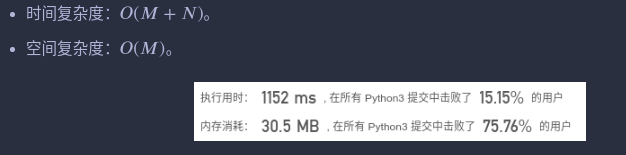

## 78. 子集
给你一个整数数组 nums ，数组中的元素 互不相同 。返回该数组所有可能的子集（幂集）。

解集 不能 包含重复的子集。你可以按 任意顺序 返回解集。


示例 1：
```
输入：nums = [1,2,3]
输出：[[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]
```

示例 2：
```
输入：nums = [0]
输出：[[],[0]]
```

提示：

- 1 <= nums.length <= 10
- -10 <= nums[i] <= 10
- nums 中的所有元素 互不相同


### 回溯算法

#### 思路一:库函数
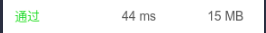

In [ ]:
from typing import List
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        subsets = []
        import itertools
        for i in range(len(nums)+1):
            for tmp in itertools.combinations(nums, i):
                subsets.append(tmp)
        return subsets

#### 思路二:迭代
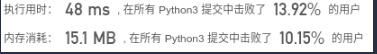

In [6]:
from typing import List
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        res = [[]]
        for i in nums:
            res = res + [[i] + num for num in res]
        return res

#### 思路三：回溯(递归)
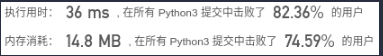

In [8]:
from typing import List
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        res = []
        n = len(nums)
        def helper(i, tmp):
            res.append(tmp)
            for j in range(i, n):
                helper(j+1, tmp+[nums[j]])
        helper(0, [])
        return res